# Loading, cleaning, and merging datasets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rentals1 = pd.read_csv('Indego_Trips_2015Q4.csv')
#print(rentals1.head(5))
rentals2 = pd.read_csv('Indego_Trips_2016Q1.csv')
#print(rentals2.head(5))
rentals3 = pd.read_csv('Indego_Trips_2016Q2.csv')
#print(rentals3.head(5))

rentals1['start_time'] = rentals1['start_time'].str.replace(r'\d+\s', '2015 ')
rentals1['end_time'] = rentals1['end_time'].str.replace(r'\d+\s', '2015 ')
print(rentals1.head(10))
rentals = rentals1.append(rentals2).append(rentals3)
rentals.tail(5)

   trip_id  duration      start_time        end_time  start_station_id  \
0  4376433      1140  10/1/2015 0:04  10/1/2015 0:23              3041   
1  4376434       720  10/1/2015 0:08  10/1/2015 0:20              3045   
2  4376435       600  10/1/2015 0:27  10/1/2015 0:37              3060   
3  4376437       840  10/1/2015 0:36  10/1/2015 0:50              3052   
4  4376438       360  10/1/2015 0:37  10/1/2015 0:43              3017   
5  4376439       900  10/1/2015 0:49  10/1/2015 1:04              3047   
6  4376440      1680  10/1/2015 1:00  10/1/2015 1:28              3069   
7  4376441       240  10/1/2015 1:00  10/1/2015 1:04              3031   
8  4376442     23880  10/1/2015 1:14  10/1/2015 7:52              3056   
9  4376443       720  10/1/2015 1:32  10/1/2015 1:44              3059   

   start_lat  start_lon  end_station_id   end_lat   end_lon  bike_id  \
0   39.96849  -75.13546            3026  39.94138 -75.14564     3302   
1   39.94792  -75.16237            3026  

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
170819,4828349,540,6/30/2016 23:37,6/30/2016 23:46,3028.0,39.94061,-75.14958,3063,39.94633,-75.16980,3577,30,One Way,Indego30
170820,4828348,60,6/30/2016 23:37,6/30/2016 23:38,3066.0,39.94561,-75.17348,3066,39.94561,-75.17348,3535,0,Round Trip,Walk-up
170821,4828352,900,6/30/2016 23:38,6/30/2016 23:53,3010.0,39.94711,-75.16618,3070,39.96062,-75.13983,2594,0,One Way,Walk-up
170822,4828353,60,6/30/2016 23:38,6/30/2016 23:39,3037.0,39.95424,-75.16138,3037,39.95424,-75.16138,3303,30,Round Trip,Indego30
170823,4828355,300,6/30/2016 23:40,6/30/2016 23:45,3101.0,39.94295,-75.15955,3086,39.94019,-75.16691,3687,0,One Way,Walk-up


In [3]:
rentals.head(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,4376433,1140,10/1/2015 0:04,10/1/2015 0:23,3041.0,39.96849,-75.13546,3026,39.94138,-75.14564,3302,0,One Way,Walk-up
1,4376434,720,10/1/2015 0:08,10/1/2015 0:20,3045.0,39.94792,-75.16237,3026,39.94138,-75.14564,2605,30,One Way,Indego30
2,4376435,600,10/1/2015 0:27,10/1/2015 0:37,3060.0,39.95923,-75.17036,3075,39.96718,-75.16125,2532,30,One Way,Indego30
3,4376437,840,10/1/2015 0:36,10/1/2015 0:50,3052.0,39.94732,-75.15695,3068,39.93549,-75.16711,3715,30,One Way,Indego30
4,4376438,360,10/1/2015 0:37,10/1/2015 0:43,3017.0,39.98003,-75.14371,3036,39.96844,-75.14001,3279,30,One Way,Indego30


In [4]:
rentals.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

In [5]:
stime = '(?P<hour>\d+):(?P<minute>\d+)'
stimes = rentals['start_time'].str.extract(stime, expand=True)
stimes.head(5)
etime = '(?P<hour>\d+):(?P<minute>\d+)'
etimes = rentals['end_time'].str.extract(etime, expand=True)
etimes.head(5)
rentals['start_hour']=stimes['hour'].astype(float)
rentals['end_hour']=etimes['hour'].astype(float)
rentals['count']=1

date = '(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)'
dates = rentals['start_time'].str.extract(date, expand=True)
print(dates.dtypes)
rentals['date']=dates['year'].astype(str)+'-'+dates['month'].astype(str)+'-'+dates['day'].astype(str)

month    object
day      object
year     object
dtype: object


In [6]:
print(rentals.shape[0])
rentals.head(5)
rentals.tail(5)

365776


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,end_hour,count,date
170819,4828349,540,6/30/2016 23:37,6/30/2016 23:46,3028.0,39.94061,-75.14958,3063,39.94633,-75.16980,3577,30,One Way,Indego30,23.0,23.0,1,2016-6-30
170820,4828348,60,6/30/2016 23:37,6/30/2016 23:38,3066.0,39.94561,-75.17348,3066,39.94561,-75.17348,3535,0,Round Trip,Walk-up,23.0,23.0,1,2016-6-30
170821,4828352,900,6/30/2016 23:38,6/30/2016 23:53,3010.0,39.94711,-75.16618,3070,39.96062,-75.13983,2594,0,One Way,Walk-up,23.0,23.0,1,2016-6-30
170822,4828353,60,6/30/2016 23:38,6/30/2016 23:39,3037.0,39.95424,-75.16138,3037,39.95424,-75.16138,3303,30,Round Trip,Indego30,23.0,23.0,1,2016-6-30
170823,4828355,300,6/30/2016 23:40,6/30/2016 23:45,3101.0,39.94295,-75.15955,3086,39.94019,-75.16691,3687,0,One Way,Walk-up,23.0,23.0,1,2016-6-30


272
count     272.000000
mean     1344.764706
std       668.665458
min         1.000000
25%       756.000000
50%      1329.500000
75%      1781.250000
max      2973.000000
Name: count, dtype: float64


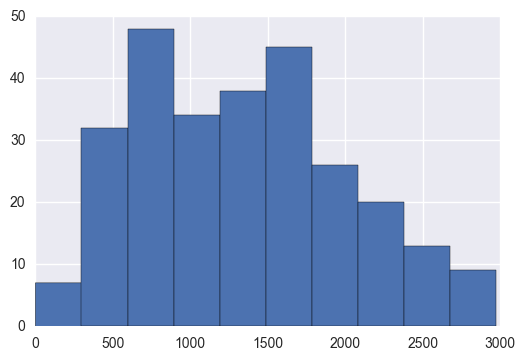

In [7]:
rentals_countt = rentals.groupby('date', as_index=False).sum()
rentals_count = rentals_countt[['date','count']]
rentals_count.head(20)
print(rentals_count.shape[0])
sns.plt.hist(rentals_count['count'])
# Total number of docks is 1995
print(rentals_count['count'].describe())

In [8]:
from urllib.request import Request, urlopen
import json
req = Request('https://www.rideindego.com/stations/json/', headers={'User-Agent': 'Mozilla/5.0'})
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)
nstations = len(feed['features'])
td = [feed['features'][i]['properties']['totalDocks'] for i in range(0,nstations)]
station_id = [feed['features'][i]['properties']['kioskId'] for i in range(0,nstations)]
print(td, station_id)
station_info=pd.DataFrame({'station': station_id, 'total_docks':td})
print(station_info.head(5))
print(station_info['total_docks'].sum())

[25, 13, 17, 15, 19, 14, 19, 8, 27, 15, 25, 11, 15, 15, 18, 15, 35, 34, 21, 21, 19, 15, 17, 15, 15, 17, 29, 21, 17, 20, 16, 20, 15, 21, 19, 19, 21, 19, 18, 15, 11, 20, 29, 15, 25, 25, 19, 15, 15, 23, 23, 13, 21, 19, 25, 15, 25, 15, 15, 19, 17, 18, 23, 19, 13, 25, 15, 15, 12, 19, 21, 20, 21, 22, 19, 23, 19, 19, 23, 18, 26, 22, 13, 19, 23, 23, 22, 19, 19, 19, 18, 18, 17, 23, 19, 23, 17, 23, 18, 16, 19, 23, 19, 19] [3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3043, 3045, 3046, 3047, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3077, 3086, 3088, 3093, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3117, 3118, 3119, 3

In order to predict station popularity by hour, we want to make a new df with stations, hours, and counts of rentals at those hours.

In [9]:
weather=pd.read_csv('Weather_Oct_Jun.csv')
print(weather.columns)
weather.tail(5)

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')


,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
270,2016-6-27,86,75,64,70,64,59,93,69,44,...,10,9,3,15,8,23.0,0.56,6,Rain,181
271,2016-6-28,84,78,71,73,71,69,94,82,69,...,10,8,2,17,6,24.0,0.07,7,Rain,175
272,2016-6-29,85,77,69,72,61,52,90,63,36,...,10,10,10,17,9,25.0,T,4,Rain,327
273,2016-6-30,86,76,66,62,57,52,68,50,32,...,10,10,10,17,8,21.0,0.00,2,NaN,243
274,2016-7-1,87,81,75,71,68,62,90,76,61,...,10,10,10,21,7,25.0,T,6,Rain-Thunderstorm,178


## With the two data frames, merge them based on date

In [10]:
# do the same for the weather
weather_day = weather[['EDT','Mean TemperatureF',' Mean Humidity',' Mean Wind SpeedMPH','MeanDew PointF',\
                       ' Mean Sea Level PressureIn',' Mean VisibilityMiles',' Events']]
weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      'mean visib','Events']

# merge based on date
weather_rental = pd.merge(rentals_count, weather_day, how='left', on='date')
weather_rental.fillna('None', inplace=True)
weather_rental.tail(20)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events
252,2016-6-19,1839,78,52,8,55,30.28,10,None
253,2016-6-2,2594,73,71,7,61,30.10,10,None
254,2016-6-20,2602,79,57,7,58,30.10,10,None
255,2016-6-21,2566,80,64,10,64,29.83,10,None
256,2016-6-22,2625,79,55,11,61,29.85,9,None
257,2016-6-23,2123,78,68,8,65,29.86,9,Rain
258,2016-6-24,2760,75,74,9,65,29.99,9,None
259,2016-6-25,2345,77,63,7,59,30.16,9,None
260,2016-6-26,2365,76,64,6,58,30.20,10,None
261,2016-6-27,2249,75,69,8,64,30.05,9,Rain


## Now calculate classifier for bike demand low = 0, or fair = 1, busy = 2, very busy = 3

In [11]:
stats=rentals_count['count'].describe()

def is_busy(row):
    stats=rentals_count['count'].describe()
    #if bikes parked at that station at that hour is greater, we know station is mostly full (so not busy)
    if row['count'] <= stats['25%']:
        return 0
    elif row['count'] > stats['25%'] and row['count'] <= stats['50%']:
        return 1
    elif row['count'] > stats['50%'] and row['count'] <= stats['75%']:
        return 2
    else:
        return 3
        
weather_rental['is_busy'] = weather_rental.apply(is_busy, axis=1)
weather_rental.head(5)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
0,2015-10-1,1247,61,73,16,52,30.05,8,Rain,1
1,2015-10-10,1974,59,54,8,41,30.09,10,None,3
2,2015-10-11,1798,59,62,5,45,29.98,10,None,3
3,2015-10-12,2120,64,56,6,49,29.84,9,None,3
4,2015-10-13,2077,68,70,9,56,29.61,10,None,3


In [12]:
weather_rental.to_csv('weather_rental.csv', index=False)

### Now we have a clean dataframe with the date, weather info, hour, and bike rental counts

# Time to train and predict

In [13]:
train = weather_rental.sample(frac=.8)
test = weather_rental.loc[~weather_rental.index.isin(train.index)]
test.head(3)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
2,2015-10-11,1798,59,62,5,45,29.98,10,None,3
6,2015-10-15,1935,59,53,9,41,30.00,10,None,3
15,2015-10-23,2079,57,52,10,37,30.23,10,None,3


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

predictors = list(weather_rental.columns)
predictors.remove('date')
predictors.remove('count')
predictors.remove('is_busy')
predictors.remove('Events')

reg = RandomForestClassifier(n_estimators=10, max_depth=None, \
                            min_samples_split=10, min_samples_leaf=5, max_features='auto')
reg.fit(train[predictors], train['is_busy'])

pred = reg.predict(test[predictors])
mse = mean_squared_error(test['is_busy'],pred)
print(mse)

print (pred[:15])
print (test['is_busy'].iloc[:15])
test.head(15)

0.481481481481
[2 2 2 2 1 2 2 1 0 2 1 1 2 0 2]
2     3
6     3
15    3
35    2
37    1
38    2
40    2
45    1
46    1
49    0
69    0
75    0
78    0
85    1
91    2
Name: is_busy, dtype: int64


,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
2,2015-10-11,1798,59,62,5,45,29.98,10,None,3
6,2015-10-15,1935,59,53,9,41,30.00,10,None,3
15,2015-10-23,2079,57,52,10,37,30.23,10,None,3
35,2015-11-13,1638,54,49,16,30,29.77,10,None,2
37,2015-11-15,1103,49,53,10,31,30.30,10,None,1
38,2015-11-16,1691,57,47,7,35,30.25,10,None,2
40,2015-11-18,1664,52,73,8,45,30.42,10,None,2
45,2015-11-22,960,47,60,13,32,29.94,10,None,1
46,2015-11-23,1120,39,37,12,14,30.12,10,None,1
49,2015-11-26,568,51,65,2,39,30.74,10,None,0


# Pull weather data for today and predict for this hour

In [15]:
req = Request('http://api.wunderground.com/api/1e806efcbfa974b3/geolookup/conditions/q/PA/Philadelphia.json')
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)

print (feed['location']['city'])
print (feed['current_observation']['temp_f'])
print (feed['current_observation']['wind_mph'])
print (feed['current_observation']['relative_humidity'])


#weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      #'mean visib']
print(predictors)

import re
re=re.findall(r'\d+', feed['current_observation']['relative_humidity'])
temp=feed['current_observation']['temp_f']
wind=feed['current_observation']['wind_mph']
dew=feed['current_observation']['dewpoint_f']
pressure=feed['current_observation']['pressure_in']
visibility=feed['current_observation']['visibility_mi']
hum=float(re[0])
hour=20.0

data=[[temp,hum,wind,dew,pressure,visibility]]
#today = pd.DataFrame(data,columns=predictors)

#print(today)
reg.predict(data)

Philadelphia
62.8
1.1
44%
['mean temp', 'mean hum', 'mean wind', 'mean dew', 'mean pressure', 'mean visib']


array([3])

In [16]:
testread=pd.read_csv('weather_rental.csv')
print(testread.columns)

Index(['date', 'count', 'mean temp', 'mean hum', 'mean wind', 'mean dew',
       'mean pressure', 'mean visib', 'Events', 'is_busy'],
      dtype='object')


# Further practice and analysis - Visualizing with d3.js

In [17]:
weather_rental.head(10)

,date,count,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,Events,is_busy
0,2015-10-1,1247,61,73,16,52,30.05,8,Rain,1
1,2015-10-10,1974,59,54,8,41,30.09,10,None,3
2,2015-10-11,1798,59,62,5,45,29.98,10,None,3
3,2015-10-12,2120,64,56,6,49,29.84,9,None,3
4,2015-10-13,2077,68,70,9,56,29.61,10,None,3
5,2015-10-14,2083,63,57,11,46,29.80,10,None,3
6,2015-10-15,1935,59,53,9,41,30.00,10,None,3
7,2015-10-16,2006,58,57,9,39,30.02,10,None,3
8,2015-10-17,1456,51,51,11,32,30.16,10,None,2
9,2015-10-18,1092,46,55,9,28,30.32,10,None,1


We want to wrangle the data again, for a more simple format to feed into d3

In [25]:
weather_simple = weather_rental;
date = '(?P<year>\d+)-(?P<month>\d+)-(?P<day>\d+)'
extract_date = weather_simple['date'].str.extract(date, expand=True)
weather_simple['year']=extract_date['year']
weather_simple['month']=extract_date['month']
weather_simple['day']=extract_date['day']
weather_simple.head(5)

cols_toprint=['year','month','day','count']
pr = weather_simple[cols_toprint]
pr.to_csv('weather_d3.csv', index=False)
pr.head(5)

,year,month,day,count
0,2015,10,1,1247
1,2015,10,10,1974
2,2015,10,11,1798
3,2015,10,12,2120
4,2015,10,13,2077
